## **Import necessary modules**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
titanic_data = pd.read_csv("train.csv")

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Data cleaning**

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Visualization**

In [18]:
sns.set()
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

<Axes: xlabel='Survived', ylabel='count'>

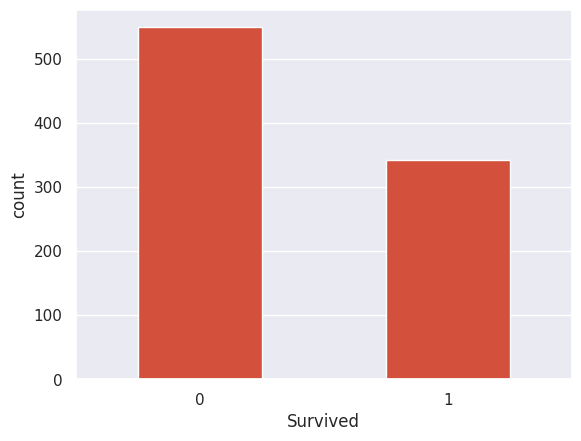

In [23]:
sns.countplot(x=titanic_data['Survived'],width=0.5,color='#eb3e23')

In [24]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

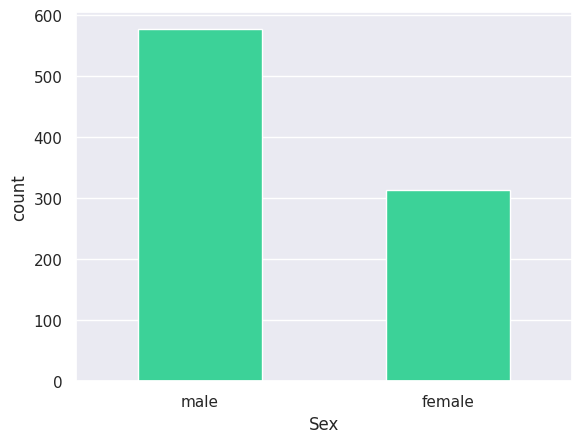

In [30]:
sns.countplot(x=titanic_data['Sex'],width=0.5,color='#23eb9e')

<Axes: xlabel='Sex', ylabel='count'>

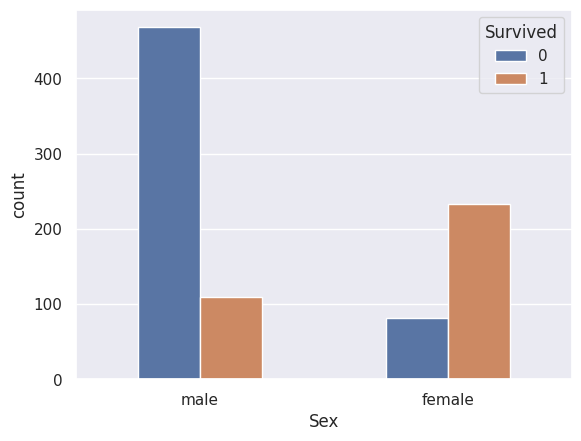

In [39]:
sns.countplot(data=titanic_data,x='Sex',hue='Survived',width=0.5)

# **Data Train Test Split**

In [41]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [43]:
x=titanic_data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y=titanic_data['Survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)

(891, 7)
(712, 7)
(179, 7)


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
l1 = logreg.score(X_train, y_train)*100
l2 = logreg.score(X_test, y_test)*100
print("Logistic Regression on training set: {:.2f}".format(l1))
print("Logistic Regression on test set: {:.2f}".format(l2))

Logistic Regression on training set: 80.20
Logistic Regression on test set: 79.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)*100
r2 = rf.score(X_test, y_test)*100
print("Random Forest Regressor on training set: {:.3f}".format(r1))
print("Random Forest Regressor on test set: {:.3f}".format(r2))

Random Forest Regressor on training set: 87.841
Random Forest Regressor on test set: 41.612


In [66]:
models = ['Linear Regression','Random Forest Regressor']
tests_score = [l2,r2]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
0,Linear Regression,79.888268
1,Random Forest Regressor,41.612317


<Axes: xlabel='Tests Score', ylabel='Algorithms'>

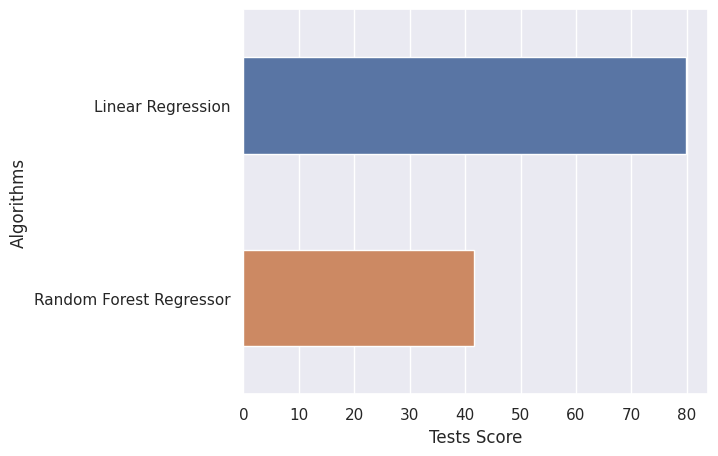

In [73]:
plt.figure(figsize=(6,5))
sns.barplot(x = "Tests Score", y = "Algorithms", data = compare_models,width=0.5)